In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('C://Users/Radhika/Desktop/medical_examination.csv',encoding='latin')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
#adding overweight column
df['overweight'] = (df['weight']/((df['height']*0.01)**2) > 25).astype(int)

In [10]:
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)

In [12]:
df_cat = f_cat = pd.melt(df,id_vars=['cardio'],value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])

In [13]:
from pandas import DataFrame

In [14]:
df_cat = pd.DataFrame(df_cat.groupby(['cardio','variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()

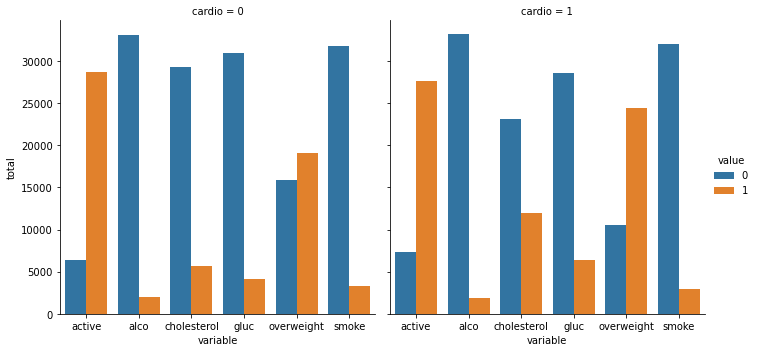

In [15]:
sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')

In [16]:
df_heat=df[(df['ap_lo'] <= df['ap_hi'])
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]

In [17]:
corr = df_heat.corr()

In [19]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

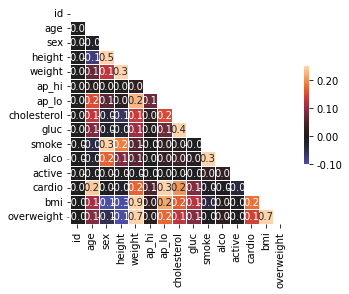

In [20]:
sns.heatmap(corr,linewidth=.5,annot=True,fmt='.1f',mask=mask,square=True,center=0,vmin=-0.1,vmax=0.25,cbar_kws={'shrink':.45,'format':'%.2f'})